# **Practical Activity Notebook**

---
###### ${By \ Gustavo\ Schiavone\ Crestana,\ \ Renato\ Augusto\ Corrêa\ dos \ Santos,\ \& \ Nathalia\ Graf\ Grachet}$

# **Data COVID-19 ("cleaned")**

The data used in the practical activity is available on the Johns Hopkins University website. However, some inconsistencies were found, and a new repository has been created to host COVID-19 data. We will use this data from now on.

Reference:
 * Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1.

To our knowledge, other activities have been conducted with COVID-19 epidemiology data (in R):
 * [Shumskaya](https://qubeshub.org/publications/2439/1), Maria, et al. "Statistics with epidemiology of COVID-19." (2021).

#### Topics taught or explored:
  * Importing files and manipulating DataFrames in pandas
  * seaborn

#### Activity responsible:
  * Renato Augusto Corrêa dos Santos
  * Gustavo Crestana
  * Nathalia Graf Grachet

*Example objectives:*
#### Objectives
  * Select columns of interest using loc[]
  * Sort values in columns using sort_values()
  * Group data using groupby()
  * etc.

#### Preliminary Questions
  * What are the countries with the highest absolute number of confirmed COVID-19 cases?

  * For Brazil, the United States, and China, what are the numbers of confirmed cases in different regions?

#### Importing files

There are two ways to import data into the notebook depending on the source:

  * Importing data from Google Drive and using these files.

  * Using a function to import data from Google Drive using a Python library.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('/content/drive/MyDrive/2021/Material_e_Apresentacao/Dados/COVID-19/cleaned_JHU_data/02-24-2021_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/02-24-2021_cleaned.csv'

In [ ]:
cases_COVID19_02242021 = pd.read_csv('/content/drive/MyDrive/2021/Material_e_Apresentacao/Dados/COVID-19/cleaned_JHU_data/02-24-2021_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/2021/Material_e_Apresentacao/Dados/COVID-19/cleaned_JHU_data/02-24-2021_cleaned.csv'

Another way to import the same tabulated data is by using google.colab:

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving 02-24-2021_cleaned.csv to 02-24-2021_cleaned.csv


{'02-24-2021_cleaned.csv': b'"Date_Published","FIPS","Admin2","Province_State","Country_Region","Last_Update","Latitude","Longitude","Confirmed","Deaths","Recovered","Active","Combined_Key"\n"02-24-2021",NA,NA,NA,"Afghanistan",2021-02-25 05:24:57,33.93911,67.709953,55664,2436,49086,4142,"Afghanistan"\n"02-24-2021",NA,NA,NA,"Albania",2021-02-25 05:24:57,41.1533,20.1683,103327,1715,66309,35303,"Albania"\n"02-24-2021",NA,NA,NA,"Algeria",2021-02-25 05:24:57,28.0339,1.6596,112461,2970,77537,31954,"Algeria"\n"02-24-2021",NA,NA,NA,"Andorra",2021-02-25 05:24:57,42.5063,1.5218,10775,110,10319,346,"Andorra"\n"02-24-2021",NA,NA,NA,"Angola",2021-02-25 05:24:57,-11.2027,17.8739,20640,501,19221,918,"Angola"\n"02-24-2021",NA,NA,NA,"Antigua and Barbuda",2021-02-25 05:24:57,17.0608,-61.7964,646,14,233,399,"Antigua and Barbuda"\n"02-24-2021",NA,NA,NA,"Argentina",2021-02-25 05:24:57,-38.4161,-63.6167,2085411,51650,1882568,151193,"Argentina"\n"02-24-2021",NA,NA,NA,"Armenia",2021-02-25 05:24:57,40.0691,45.

The same pandas method for importing a table from a repository can be used here:

In [ ]:
cases_COVID19_02242021 = pd.read_csv('02-24-2021_cleaned.csv')

Let's take a look at the data types present in the DataFrame:

In [ ]:
cases_COVID19_02242021.dtypes

Date_Published     object
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Latitude          float64
Longitude         float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active            float64
Combined_Key       object
dtype: object

Let's see what the columns in our DataFrame are:

In [ ]:
cases_COVID19_02242021.columns

Index(['Date_Published', 'FIPS', 'Admin2', 'Province_State', 'Country_Region',
       'Last_Update', 'Latitude', 'Longitude', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Combined_Key'],
      dtype='object')

In [ ]:
cases_COVID19_02242021[["Province_State","Country_Region","Confirmed","Recovered"]]

,Province_State,Country_Region,Confirmed,Recovered
0,NaN,Afghanistan,55664,49086
1,NaN,Albania,103327,66309
2,NaN,Algeria,112461,77537
3,NaN,Andorra,10775,10319
4,NaN,Angola,20640,19221
...,...,...,...,...
3978,NaN,Yemen,2221,1433
3979,NaN,Zambia,76484,69803
3980,NaN,Zimbabwe,35960,32410
3981,Alaska,United States,206,0


Curiosity: it is possible to change the names of columns.

In [ ]:
cases_COVID19_02242021.columns

Index(['Date_Published', 'FIPS', 'Admin2', 'Province_State', 'Country_Region',
       'Last_Update', 'Latitude', 'Longitude', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Combined_Key'],
      dtype='object')

In [ ]:
cases_COVID19_02242021.rename(columns = {'Country_Region':'Pais_Regiao'}, inplace=True)

,Date_Published,FIPS,Admin2,Province_State,Pais_Regiao,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key
0,02-24-2021,NaN,NaN,NaN,Afghanistan,2021-02-25 05:24:57,33.939110,67.709953,55664,2436,49086,4142.0,Afghanistan
1,02-24-2021,NaN,NaN,NaN,Albania,2021-02-25 05:24:57,41.153300,20.168300,103327,1715,66309,35303.0,Albania
2,02-24-2021,NaN,NaN,NaN,Algeria,2021-02-25 05:24:57,28.033900,1.659600,112461,2970,77537,31954.0,Algeria
3,02-24-2021,NaN,NaN,NaN,Andorra,2021-02-25 05:24:57,42.506300,1.521800,10775,110,10319,346.0,Andorra
4,02-24-2021,NaN,NaN,NaN,Angola,2021-02-25 05:24:57,-11.202700,17.873900,20640,501,19221,918.0,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,02-24-2021,NaN,NaN,NaN,Yemen,2021-02-25 05:24:57,15.552727,48.516388,2221,624,1433,164.0,Yemen
3979,02-24-2021,NaN,NaN,NaN,Zambia,2021-02-25 05:24:57,-13.133897,27.849332,76484,1051,69803,5630.0,Zambia
3980,02-24-2021,NaN,NaN,NaN,Zimbabwe,2021-02-25 05:24:57,-19.015438,29.154857,35960,1456,32410,2094.0,Zimbabwe
3981,02-24-2021,2066.0,Copper River,Alaska,United States,2021-04-02 15:13:53,60.388600,-162.890520,206,0,0,206.0,"Copper River, Alaska, United States"


If desired, it's also possible to change all columns at once using a dictionary. Here's an example (https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe).

The new daily data does not include the "incident_rate" column.

# Exploring data for Brazil

Some questions:

1. Which state in Brazil has the highest number of confirmed COVID-19 cases?
2. Which state in Brazil has the lowest number of confirmed COVID-19 cases?

In [ ]:
cases_COVID19_Brazil = cases_COVID19_02242021[cases_COVID19_Brazil["Country_Region"] == "Brazil"]

In [ ]:
cases_COVID19_Brazil

,Date_Published,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key
41,02-24-2021,NaN,NaN,Acre,Brazil,2021-02-25 05:24:57,-9.0238,-70.8120,55881,975,46097,8809.0,"Acre, Brazil"
42,02-24-2021,NaN,NaN,Alagoas,Brazil,2021-02-25 05:24:57,-9.5713,-36.7820,129445,2959,123483,3003.0,"Alagoas, Brazil"
43,02-24-2021,NaN,NaN,Amapa,Brazil,2021-02-25 05:24:57,0.9020,-52.0030,82868,1131,60115,21622.0,"Amapa, Brazil"
44,02-24-2021,NaN,NaN,Amazonas,Brazil,2021-02-25 05:24:57,-3.4168,-65.8561,310919,10642,263580,36697.0,"Amazonas, Brazil"
45,02-24-2021,NaN,NaN,Bahia,Brazil,2021-02-25 05:24:57,-12.5797,-41.7007,664904,11388,631606,21910.0,"Bahia, Brazil"
46,02-24-2021,NaN,NaN,Ceara,Brazil,2021-02-25 05:24:57,-5.4984,-39.3206,415664,11087,308294,96283.0,"Ceara, Brazil"
47,02-24-2021,NaN,NaN,Distrito Federal,Brazil,2021-02-25 05:24:57,-15.7998,-47.8645,292714,4791,281023,6900.0,"Distrito Federal, Brazil"
48,02-24-2021,NaN,NaN,Espirito Santo,Brazil,2021-02-25 05:24:57,-19.1834,-40.3089,321535,6337,302405,12793.0,"Espirito Santo, Brazil"
49,02-24-2021,NaN,NaN,Goias,Brazil,2021-02-25 05:24:57,-15.8270,-49.8362,387582,8409,370197,8976.0,"Goias, Brazil"
50,02-24-2021,NaN,NaN,Maranhao,Brazil,2021-02-25 05:24:57,-4.9609,-45.2744,217302,4977,202349,9976.0,"Maranhao, Brazil"


Since the indices are maintained when selecting data, it can be appropriate to use the reset_index method when creating a new DataFrame to reset the index and assign default integer indices to the rows. This can be helpful in cases where you want to have a clean DataFrame with continuous integer indices, especially after filtering or manipulating the data.

In [ ]:
cases_COVID19_Brazil = cases_COVID19_Brazil_limpos.reset_index()

In [ ]:
cases_COVID19_Brazil

,index,Date_Published,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key
0,41,02-24-2021,NaN,NaN,Acre,Brazil,2021-02-25 05:24:57,-9.0238,-70.8120,55881,975,46097,8809.0,"Acre, Brazil"
1,42,02-24-2021,NaN,NaN,Alagoas,Brazil,2021-02-25 05:24:57,-9.5713,-36.7820,129445,2959,123483,3003.0,"Alagoas, Brazil"
2,43,02-24-2021,NaN,NaN,Amapa,Brazil,2021-02-25 05:24:57,0.9020,-52.0030,82868,1131,60115,21622.0,"Amapa, Brazil"
3,44,02-24-2021,NaN,NaN,Amazonas,Brazil,2021-02-25 05:24:57,-3.4168,-65.8561,310919,10642,263580,36697.0,"Amazonas, Brazil"
4,45,02-24-2021,NaN,NaN,Bahia,Brazil,2021-02-25 05:24:57,-12.5797,-41.7007,664904,11388,631606,21910.0,"Bahia, Brazil"
5,46,02-24-2021,NaN,NaN,Ceara,Brazil,2021-02-25 05:24:57,-5.4984,-39.3206,415664,11087,308294,96283.0,"Ceara, Brazil"
6,47,02-24-2021,NaN,NaN,Distrito Federal,Brazil,2021-02-25 05:24:57,-15.7998,-47.8645,292714,4791,281023,6900.0,"Distrito Federal, Brazil"
7,48,02-24-2021,NaN,NaN,Espirito Santo,Brazil,2021-02-25 05:24:57,-19.1834,-40.3089,321535,6337,302405,12793.0,"Espirito Santo, Brazil"
8,49,02-24-2021,NaN,NaN,Goias,Brazil,2021-02-25 05:24:57,-15.8270,-49.8362,387582,8409,370197,8976.0,"Goias, Brazil"
9,50,02-24-2021,NaN,NaN,Maranhao,Brazil,2021-02-25 05:24:57,-4.9609,-45.2744,217302,4977,202349,9976.0,"Maranhao, Brazil"


In [ ]:
cases_COVID19_Brazil["Confirmed"].max()

2002640

In [ ]:
cases_COVID19_Brazil["Confirmed"].min()

55881

In [ ]:
cases_COVID19_Brazil[cases_COVID19_Brazil["Confirmed"] == cases_COVID19_Brazil["Confirmed"].max()]

,index,Date_Published,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key
24,65,02-24-2021,NaN,NaN,Sao Paulo,Brazil,2021-02-25 05:24:57,-23.5505,-46.6333,2002640,58528,1786558,157554.0,"Sao Paulo, Brazil"


In [ ]:
cases_COVID19_Brazil[cases_COVID19_Brazil["Confirmed"] == cases_COVID19_Brazil["Confirmed"].min()]

,index,Date_Published,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key
0,41,02-24-2021,NaN,NaN,Acre,Brazil,2021-02-25 05:24:57,-9.0238,-70.812,55881,975,46097,8809.0,"Acre, Brazil"


In [ ]:
cases_COVID19_Brazil["Province_State"]

0                    Acre
1                 Alagoas
2                   Amapa
3                Amazonas
4                   Bahia
5                   Ceara
6        Distrito Federal
7          Espirito Santo
8                   Goias
9                Maranhao
10            Mato Grosso
11     Mato Grosso do Sul
12           Minas Gerais
13                   Para
14                Paraiba
15                 Parana
16             Pernambuco
17                  Piaui
18    Rio Grande do Norte
19      Rio Grande do Sul
20         Rio de Janeiro
21               Rondonia
22                Roraima
23         Santa Catarina
24              Sao Paulo
25                Sergipe
26              Tocantins
Name: Province_State, dtype: object

In [ ]:
cases_COVID19_Brazil.index

RangeIndex(start=0, stop=27, step=1)

Population data for Brazilian states was obtained from [here](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)


Note: You can work with the students by creating a DataFrame using a dictionary or by importing a new table with this data.

In [ ]:
cases_COVID19_Brazil_pop = pd.DataFrame({"Population":[894470, 3351543, 861773, 4207714, 14930634, 9187103, 3055149, 4064052, 7113540, 7114598, 3526220, 2809394, 21292666, 8690745, 4039277, 11516840, 9616621, 3281480, 3534165, 11422973, 17366189, 1796460, 631181, 7252502, 46289333, 2318822,1590248]},index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])

In [ ]:
cases_COVID19_Brazil_pop

,Population
0,894470
1,3351543
2,861773
3,4207714
4,14930634
5,9187103
6,3055149
7,4064052
8,7113540
9,7114598


In [ ]:
cases_COVID19_Brazil["Population"]=cases_COVID19_Brazil_pop

In [ ]:
cases_COVID19_Brazil

,index,Date_Published,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Population
0,41,02-24-2021,NaN,NaN,Acre,Brazil,2021-02-25 05:24:57,-9.0238,-70.8120,55881,975,46097,8809.0,"Acre, Brazil",894470
1,42,02-24-2021,NaN,NaN,Alagoas,Brazil,2021-02-25 05:24:57,-9.5713,-36.7820,129445,2959,123483,3003.0,"Alagoas, Brazil",3351543
2,43,02-24-2021,NaN,NaN,Amapa,Brazil,2021-02-25 05:24:57,0.9020,-52.0030,82868,1131,60115,21622.0,"Amapa, Brazil",861773
3,44,02-24-2021,NaN,NaN,Amazonas,Brazil,2021-02-25 05:24:57,-3.4168,-65.8561,310919,10642,263580,36697.0,"Amazonas, Brazil",4207714
4,45,02-24-2021,NaN,NaN,Bahia,Brazil,2021-02-25 05:24:57,-12.5797,-41.7007,664904,11388,631606,21910.0,"Bahia, Brazil",14930634
5,46,02-24-2021,NaN,NaN,Ceara,Brazil,2021-02-25 05:24:57,-5.4984,-39.3206,415664,11087,308294,96283.0,"Ceara, Brazil",9187103
6,47,02-24-2021,NaN,NaN,Distrito Federal,Brazil,2021-02-25 05:24:57,-15.7998,-47.8645,292714,4791,281023,6900.0,"Distrito Federal, Brazil",3055149
7,48,02-24-2021,NaN,NaN,Espirito Santo,Brazil,2021-02-25 05:24:57,-19.1834,-40.3089,321535,6337,302405,12793.0,"Espirito Santo, Brazil",4064052
8,49,02-24-2021,NaN,NaN,Goias,Brazil,2021-02-25 05:24:57,-15.8270,-49.8362,387582,8409,370197,8976.0,"Goias, Brazil",7113540
9,50,02-24-2021,NaN,NaN,Maranhao,Brazil,2021-02-25 05:24:57,-4.9609,-45.2744,217302,4977,202349,9976.0,"Maranhao, Brazil",7114598


## Calculation of Incidence

Calculation method:

 * (confirmed cases * 100,000) / population

In [ ]:
(cases_COVID19_Brazil.Confirmed * 100000) / cases_COVID19_Brazil.Population

0      6247.386721
1      3862.250910
2      9615.989361
3      7389.261723
4      4453.287114
5      4524.429518
6      9581.005705
7      7911.685185
8      5448.510868
9      3054.311712
10     6948.573827
11     6344.784676
12     4008.229876
13     4134.156508
14     5335.781626
15     5452.077132
16     3062.187852
17     5212.038470
18     4590.476110
19     5422.274919
20     3323.601972
21     8095.198335
22    12749.433205
23     9002.341537
24     4326.353115
25     6428.997137
26     7003.310176
dtype: float64

In [ ]:
cases_COVID19_Brazil["Incident_rate"] = (cases_COVID19_Brazil.Confirmed * 100000) / cases_COVID19_Brazil.Population

In [ ]:
cases_COVID19_Brazil[cases_COVID19_Brazil["Incident_rate"] == cases_COVID19_Brazil["Incident_rate"].max()]

,index,Date_Published,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Population,Incident_rate
22,63,02-24-2021,NaN,NaN,Roraima,Brazil,2021-02-25 05:24:57,-2.7376,-62.0751,80472,1074,74830,4568.0,"Roraima, Brazil",631181,12749.433205


In [ ]:
cases_COVID19_Brazil[cases_COVID19_Brazil["Incident_rate"] == cases_COVID19_Brazil["Incident_rate"].min()]

,Date_Published,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Population,Incident_rate
50,02-24-2021,NaN,NaN,Maranhao,Brazil,2021-02-25 05:24:57,-4.9609,-45.2744,217302,4977,202349,9976.0,"Maranhao, Brazil",7114598,3054.311712


In [ ]:
cases_COVID19_Brazil.head()

,index,Date_Published,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Population,Incident_rate
0,41,02-24-2021,NaN,NaN,Acre,Brazil,2021-02-25 05:24:57,-9.0238,-70.8120,55881,975,46097,8809.0,"Acre, Brazil",894470,6247.386721
1,42,02-24-2021,NaN,NaN,Alagoas,Brazil,2021-02-25 05:24:57,-9.5713,-36.7820,129445,2959,123483,3003.0,"Alagoas, Brazil",3351543,3862.250910
2,43,02-24-2021,NaN,NaN,Amapa,Brazil,2021-02-25 05:24:57,0.9020,-52.0030,82868,1131,60115,21622.0,"Amapa, Brazil",861773,9615.989361
3,44,02-24-2021,NaN,NaN,Amazonas,Brazil,2021-02-25 05:24:57,-3.4168,-65.8561,310919,10642,263580,36697.0,"Amazonas, Brazil",4207714,7389.261723
4,45,02-24-2021,NaN,NaN,Bahia,Brazil,2021-02-25 05:24:57,-12.5797,-41.7007,664904,11388,631606,21910.0,"Bahia, Brazil",14930634,4453.287114


#### Let's create some charts (Seaborn)

With population values, incidence, and the number of confirmed COVID-19 cases until February, let's explore some charts. Unlike what Rafaella did on Tuesday, we'll explore another library called Seaborn.

Let's import Seaborn.

In [ ]:
import seaborn as sns

We will use the [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html) function from Seaborn.

In [ ]:
sns.set_theme(style="whitegrid")

Generating the chart:

In [ ]:
ax = sns.barplot(x="Combined_Key", y="Population", data=dados_COVID19_Brasil_limpos)

NameError: name 'dados_COVID19_Brasil_limpos' is not defined

The set_theme function allows for the adjustment of aesthetic aspects. Let's take a look:

In [ ]:
sns.set_theme(style="white")

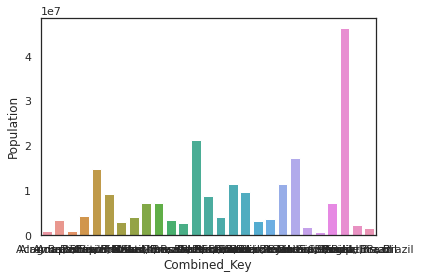

In [ ]:
ax = sns.barplot(x="Combined_Key", y="Population", data=cases_COVID19_Brazil)

In [ ]:
sns.set_theme()

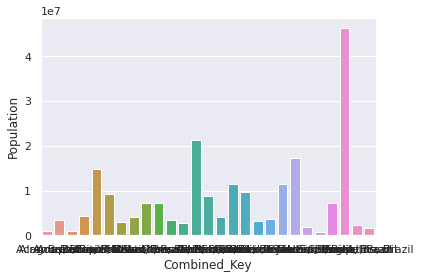

In [ ]:
ax = sns.barplot(x="Combined_Key", y="Population", data=cases_COVID19_Brazil)

The set_style function allows for the inclusion of some additional characteristics in the chart:

In [ ]:
sns.set_theme()

NameError: name 'sns' is not defined

In [ ]:
sns.set_style('ticks') #darkgrid, whitegrid, dark, white, ticks

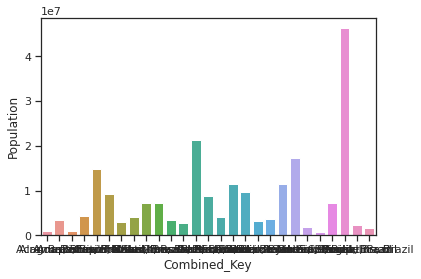

In [ ]:
ax = sns.barplot(x="Combined_Key", y="Population", data=cases_COVID19_Brazil)

One of the questions that may arise at this point is:
 * How to export the generated figures?

In [ ]:
fig = ax.get_figure()

In [ ]:
fig.savefig('example1.png', dpi=300, bbox_inches="tight")

But this is not a good time to export a figure. After all, these overlapping names on the X-axis look terrible... how can we fix that?

Seaborn has a series of functions to handle the [aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) of the plots.

(For those who have worked a bit in R, you may have noticed that there are similar features in the ggplot2 library).

In [ ]:
sns.set_theme()

NameError: name 'sns' is not defined

In [ ]:
ax = sns.barplot(x="Combined_Key", y="Population", data=cases_COVID19_Brazil)
ax.set_xticklabels(cases_COVID19_Brazil.Combined_Key, rotation=90)
ax.set_ylabel("Population")
ax.set_xlabel("State")
fig = ax.get_figure()

NameError: name 'sns' is not defined

In [ ]:
fig.savefig('example2.png', dpi=300, bbox_inches="tight")


Searching the internet (there are numerous interesting cheat sheets, like this one), what would be the interesting charts to create with the data analyzed so far?

  * Retrieve the most recent data from the repository (up to September 2021).
  * Generate a chart using Seaborn. In addition to population, students are free to explore incidence data and other data in the same table.

# COVID Part II #

In [ ]:
import  pandas as pd

In [ ]:
from google.colab import drive
# using drive.mount('/content/drive') you can mount your drive to Google Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Using a pandas function, read the CSV file by providing its path.
pd.read_csv('/content/drive/MyDrive/Eventos Científicos 2021/Workshop Python 2021/Material_e_Apresentacao/Dados/COVID-19/cleaned_JHU_data/04-15-2021.csv')

,Date_Published,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key
0,04-15-2021,NaN,NaN,NaN,Afghanistan,2021-04-16 04:20:46,33.939110,67.709953,57534,2533,52083.0,2918.0,Afghanistan
1,04-15-2021,NaN,NaN,NaN,Albania,2021-04-16 04:20:46,41.153300,20.168300,129128,2335,100013.0,26780.0,Albania
2,04-15-2021,NaN,NaN,NaN,Algeria,2021-04-16 04:20:46,28.033900,1.659600,119142,3144,83048.0,32950.0,Algeria
3,04-15-2021,NaN,NaN,NaN,Andorra,2021-04-16 04:20:46,42.506300,1.521800,12641,121,11989.0,531.0,Andorra
4,04-15-2021,NaN,NaN,NaN,Angola,2021-04-16 04:20:46,-11.202700,17.873900,23951,557,22175.0,1219.0,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,04-15-2021,NaN,NaN,NaN,Vietnam,2021-04-16 04:20:46,14.058324,108.277199,2758,35,2445.0,278.0,Vietnam
7962,04-15-2021,NaN,NaN,NaN,West Bank and Gaza,2021-04-16 04:20:46,31.952200,35.233200,276407,2937,241343.0,32127.0,West Bank and Gaza
7963,04-15-2021,NaN,NaN,NaN,Yemen,2021-04-16 04:20:46,15.552727,48.516388,5657,1097,2178.0,2382.0,Yemen
7964,04-15-2021,NaN,NaN,NaN,Zambia,2021-04-16 04:20:46,-13.133897,27.849332,90532,1230,88283.0,1019.0,Zambia


In [ ]:
COVID_15_04_21 = pd.read_csv('/content/drive/MyDrive/Eventos Científicos 2021/Workshop Python 2021/Material_e_Apresentacao/Dados/COVID-19/cleaned_JHU_data/04-15-2021.csv')
COVID_15_04_21.columns
## MIssing "Population" e "Incident_Rate"

Index(['Date_Published', 'FIPS', 'Admin2', 'Province_State', 'Country_Region',
       'Last_Update', 'Latitude', 'Longitude', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Combined_Key'],
      dtype='object')

In [ ]:
COVID_15_04_21[["Province_State","Country_Region","Confirmed","Recovered","Active"]]
# Remove missing data with dropna()
COVID_CLEAN = COVID_15_04_21[["Province_State","Country_Region","Confirmed","Recovered","Active"]].dropna()
COVID_CLEAN

,Province_State,Country_Region,Confirmed,Recovered,Active
8,Australian Capital Territory,Australia,123,120.0,0.0
9,New South Wales,Australia,5363,0.0,5309.0
10,Northern Territory,Australia,113,107.0,6.0
11,Queensland,Australia,1515,1397.0,111.0
12,South Australia,Australia,678,665.0,9.0
...,...,...,...,...,...
7952,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,4,4.0,0.0
7953,Scotland,United Kingdom,222897,0.0,215260.0
7954,Turks and Caicos Islands,United Kingdom,2367,2285.0,65.0
7955,Unknown,United Kingdom,0,0.0,0.0


# Exploring COVID data for Brazil #


In [ ]:
# Select only Brazil
COVID_CLEAN[COVID_CLEAN["Country_Region"]=="Brazil"]
# Remove duplicated data using drop.duplicates()
COVID_CLEAN[COVID_CLEAN["Country_Region"]=="Brazil"].drop_duplicates()
COVID_BRAZIL = COVID_CLEAN[COVID_CLEAN["Country_Region"]=="Brazil"].drop_duplicates()
COVID_BRAZIL

,Province_State,Country_Region,Confirmed,Recovered,Active
41,Acre,Brazil,74664,62122.0,11159.0
42,Alagoas,Brazil,163807,156009.0,3900.0
43,Amapa,Brazil,102531,74426.0,26659.0
44,Amazonas,Brazil,361628,308086.0,41205.0
45,Bahia,Brazil,852458,819319.0,16139.0
46,Ceara,Brazil,597518,411754.0,170114.0
47,Distrito Federal,Brazil,363344,343690.0,12605.0
48,Espirito Santo,Brazil,411413,379771.0,23136.0
49,Goias,Brazil,518753,494074.0,11304.0
50,Maranhao,Brazil,252848,227535.0,18576.0


# Which Brazilian state has the highest number of COVID cases? And the lowest?

In [ ]:
# Rank by confirmed
COVID_BRAZIL.sort_values(by="Confirmed")
# Ranking in descending order.
COVID_BRAZIL.sort_values(by="Confirmed", ascending=False)
# Another way to find the state with the most confirmed cases.
COVID_BRAZIL["Confirmed"].max()
# Another way to find the state with the least confirmed cases.
COVID_BRAZIL["Confirmed"].min()

74664

In [ ]:
# Retrieve the population size of Brazilian states from another DataFrame.
POPULATIONAL = pd.read_csv('/content/drive/MyDrive/Eventos Científicos 2021/Workshop Python 2021/Material_e_Apresentacao/Dados/COVID-19/cleaned_JHU_data/CSSE_DailyReports.csv')
POPULATIONAL.columns

Index(['Unnamed: 0', 'ID', 'Date_Published', 'UID', 'iso2', 'iso3', 'code3',
       'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Latitude', 'Longitude', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population'],
      dtype='object')

In [ ]:
# Get data from Brazil only
POP_1 = POPULATIONAL[["Date_Published","Province_State", "Country_Region", "Population"]]
POP_2 = POP_1[POP_1["Country_Region"]=="Brazil"]
POP_3 = POP_2[POP_2["Date_Published"]=="04-15-2021"].drop_duplicates()
POP_3

,Date_Published,Province_State,Country_Region,Population
517492,04-15-2021,Acre,Brazil,881935.0
517493,04-15-2021,Alagoas,Brazil,3337357.0
517494,04-15-2021,Amapa,Brazil,845731.0
517495,04-15-2021,Amazonas,Brazil,4144597.0
517496,04-15-2021,Bahia,Brazil,14873064.0
517497,04-15-2021,Ceara,Brazil,9132078.0
517498,04-15-2021,Distrito Federal,Brazil,3015268.0
517499,04-15-2021,Espirito Santo,Brazil,4018650.0
517500,04-15-2021,Goias,Brazil,7018354.0
517501,04-15-2021,Maranhao,Brazil,7075181.0


In [ ]:
# Remove unnecessary columns
POP_FINAL = POP_3.drop(columns=["Date_Published","Province_State","Country_Region"])
POP_FINAL
# Adjust the index based on DataFrame COVID_BRAZIL
POP_FINAL_INDEX = POP_FINAL.set_index(COVID_BRAZIL.index)
POP_FINAL_INDEX

,Population
41,881935.0
42,3337357.0
43,845731.0
44,4144597.0
45,14873064.0
46,9132078.0
47,3015268.0
48,4018650.0
49,7018354.0
50,7075181.0


In [ ]:
# Add a Population column to DataFrame COVID_BRAZIL
COVID_BRAZIL["Population"]=POP_FINAL_INDEX
COVID_BRAZIL

,Province_State,Country_Region,Confirmed,Recovered,Active,Population
41,Acre,Brazil,74664,62122.0,11159.0,881935.0
42,Alagoas,Brazil,163807,156009.0,3900.0,3337357.0
43,Amapa,Brazil,102531,74426.0,26659.0,845731.0
44,Amazonas,Brazil,361628,308086.0,41205.0,4144597.0
45,Bahia,Brazil,852458,819319.0,16139.0,14873064.0
46,Ceara,Brazil,597518,411754.0,170114.0,9132078.0
47,Distrito Federal,Brazil,363344,343690.0,12605.0,3015268.0
48,Espirito Santo,Brazil,411413,379771.0,23136.0,4018650.0
49,Goias,Brazil,518753,494074.0,11304.0,7018354.0
50,Maranhao,Brazil,252848,227535.0,18576.0,7075181.0


# Which Brazilian state has the highest incidence rate of COVID cases per 100,000 people? And the lowest? Was there any difference in the ranking of states?

## Calculation Method: (confirmed cases * 100,000) / population

In [ ]:
(COVID_BRAZIL.Confirmed * 100000) / COVID_BRAZIL.Population

41     8465.930029
42     4908.285209
43    12123.358373
44     8725.287404
45     5731.556053
46     6543.067197
47    12050.139490
48    10237.592226
49     7391.376952
50     3573.731895
51     9658.926217
52     8418.466304
53     5938.289060
54     5182.738541
55     6885.521538
56     7844.449651
57     3944.545353
58     6820.516878
59     6001.335100
60     8003.013736
61     4014.180643
62    11357.481467
63    15336.411555
64    11845.039937
65     5888.837114
66     8163.584919
67     9615.758749
dtype: float64

In [ ]:
COVID_BRAZIL["Incident_Rate"]= (COVID_BRAZIL.Confirmed * 100000) / COVID_BRAZIL.Population
COVID_BRAZIL
COVID_BRAZIL.sort_values("Incident_Rate", ascending=False)

,Province_State,Country_Region,Confirmed,Recovered,Active,Population,Incident_Rate
63,Roraima,Brazil,92902,85381.0,6099.0,605761.0,15336.411555
43,Amapa,Brazil,102531,74426.0,26659.0,845731.0,12123.358373
47,Distrito Federal,Brazil,363344,343690.0,12605.0,3015268.0,12050.139490
64,Santa Catarina,Brazil,848672,809739.0,26524.0,7164788.0,11845.039937
62,Rondonia,Brazil,201848,180089.0,17055.0,1777225.0,11357.481467
48,Espirito Santo,Brazil,411413,379771.0,23136.0,4018650.0,10237.592226
51,Mato Grosso,Brazil,336562,311244.0,16532.0,3484466.0,9658.926217
67,Tocantins,Brazil,151243,130487.0,18429.0,1572866.0,9615.758749
44,Amazonas,Brazil,361628,308086.0,41205.0,4144597.0,8725.287404
41,Acre,Brazil,74664,62122.0,11159.0,881935.0,8465.930029


# What is the incidence rate of COVID cases per 100,000 people in Brazil?

In [ ]:
Incident_Brazil = (COVID_BRAZIL["Confirmed"].sum()) * 100000 / COVID_BRAZIL["Population"].sum()
Incident_Brazil

6541.455658743845

## What is the comparison between Brazil and other populous countries (China/USA)?

## Incidence rate for China

In [ ]:
COVID_CHINA = COVID_CLEAN[COVID_CLEAN["Country_Region"]=="China"]
# https://www.worldometers.info/world-population/china-population/
Incident_China = (COVID_CHINA["Confirmed"].sum()) * 100000 / 1443796961
Incident_China

14.148111231548713

## Incidence rate for USA

In [ ]:
COVID_USA = pd.read_csv('/content/drive/MyDrive/Eventos Científicos 2021/Workshop Python 2021/Material_e_Apresentacao/Dados/COVID-19/cleaned_JHU_data/04-15-2021_USA.csv')
# https://www.worldometers.info/world-population/us-population/
Incident_USA = (COVID_USA["Confirmed"].sum()) * 100000 / 332570120
Incident_USA

9470.378457331044

# Analysis of cases over time.



Importing pandas:

In [ ]:
import pandas as pd

Importing numpy:

In [ ]:
import numpy as np

Importing data from GitHub directly, but now using multiple files:

In [ ]:
url1 = "https://raw.githubusercontent.com/Lucas-Czarnecki/COVID-19-CLEANED-JHUCSSE/master/COVID-19_CLEAN/csse_covid_19_clean_data/CSSE_DailyReports.csv"
url2 = "https://raw.githubusercontent.com/Lucas-Czarnecki/COVID-19-CLEANED-JHUCSSE/master/COVID-19_CLEAN/csse_covid_19_clean_data/CSSE_DailyReports2.csv"
list_urls = [url1, url2]
list_urls

['https://raw.githubusercontent.com/Lucas-Czarnecki/COVID-19-CLEANED-JHUCSSE/master/COVID-19_CLEAN/csse_covid_19_clean_data/CSSE_DailyReports.csv',
 'https://raw.githubusercontent.com/Lucas-Czarnecki/COVID-19-CLEANED-JHUCSSE/master/COVID-19_CLEAN/csse_covid_19_clean_data/CSSE_DailyReports2.csv']

Creating the DataFrame:

In [ ]:
csse_df = pd.DataFrame()

Import the data into the object using the map function:

In [ ]:
csse_df = pd.concat(map(pd.read_csv, list_urls))

csse_df.tail()

,ID,Date_Published,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Population
484730,2743441,2020-12-31,15699.0,CN,CHN,156.0,NaN,NaN,Unknown,China,2021-01-01 05:23:07,NaN,NaN,0.0,0.0,0.0,0.0,NaN
484731,2743442,2020-12-31,296.0,KI,KIR,296.0,NaN,NaN,NaN,Kiribati,2021-01-01 05:23:07,-3.3704,-168.7340,0.0,0.0,0.0,0.0,117606.0
484732,2743443,2020-12-31,585.0,PW,PLW,8.0,NaN,NaN,NaN,Palau,2021-01-01 05:23:07,7.5150,134.5825,0.0,0.0,0.0,0.0,18008.0
484733,2743444,2020-12-31,184.0,CK,COK,184.0,NaN,NaN,Cook Islands,New Zealand,2021-01-01 05:23:07,-21.2367,-159.7777,0.0,0.0,0.0,0.0,17459.0
484734,2743445,2020-12-31,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Summer Olympics 2020,2021-01-01 05:23:07,35.6491,139.7737,0.0,0.0,0.0,0.0,NaN


Incidence rate:

In [ ]:
csse_df['Incidence_Rate'] = csse_df['Confirmed'] / (csse_df['Population']/1e5)

In [ ]:
csse_df.head()

,ID,Date_Published,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Population,Incidence_Rate
0,83692,2020-01-22,15601.0,CN,CHN,156.0,NaN,NaN,Anhui,China,2020-01-22 17:00:00,31.8257,117.2264,1.0,0.0,0.0,1.0,63240000.0,0.001581
1,83693,2020-01-22,15602.0,CN,CHN,156.0,NaN,NaN,Beijing,China,2020-01-22 17:00:00,40.1824,116.4142,14.0,0.0,0.0,14.0,21540000.0,0.064995
2,83694,2020-01-22,15603.0,CN,CHN,156.0,NaN,NaN,Chongqing,China,2020-01-22 17:00:00,30.0572,107.8740,6.0,0.0,0.0,6.0,31020000.0,0.019342
3,83695,2020-01-22,15604.0,CN,CHN,156.0,NaN,NaN,Fujian,China,2020-01-22 17:00:00,26.0789,117.9874,1.0,0.0,0.0,1.0,39410000.0,0.002537
4,83696,2020-01-22,15605.0,CN,CHN,156.0,NaN,NaN,Gansu,China,2020-01-22 17:00:00,35.7518,104.2861,0.0,0.0,0.0,0.0,26370000.0,0.000000


To perform COVID-19 analyses over time, it will be interesting to group the data by date (year, month, and day). We can use the groupby function, as we've used before.

However, to do this, we need to extract information from a specific column in our DataFrame: Last_Update. The date in this column is combined with the update time, in fields separated by space (e.g., "2020-01-22 17:00:00").

To extract the date, we'll first extract the first field for each row:

In [ ]:
csse_df['Last_Update']

0         2020-01-22 17:00:00
1         2020-01-22 17:00:00
2         2020-01-22 17:00:00
3         2020-01-22 17:00:00
4         2020-01-22 17:00:00
                 ...         
484730    2021-01-01 05:23:07
484731    2021-01-01 05:23:07
484732    2021-01-01 05:23:07
484733    2021-01-01 05:23:07
484734    2021-01-01 05:23:07
Name: Last_Update, Length: 1072918, dtype: object

In [ ]:
csse_df['Last_Update'].str.split(' ').str[0]

0         2020-01-22
1         2020-01-22
2         2020-01-22
3         2020-01-22
4         2020-01-22
             ...    
484730    2021-01-01
484731    2021-01-01
484732    2021-01-01
484733    2021-01-01
484734    2021-01-01
Name: Last_Update, Length: 1072918, dtype: object

Saving the information:

In [ ]:
s = csse_df['Last_Update'].str.split(' ').str[0]

In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
data_extracted = pd.DataFrame()

Creating the columns for year, month, and day using the object converted to datetime (using to_datetime).

In [ ]:
data_extracted['Year'] = pd.to_datetime(s, yearfirst=True).dt.year

In [ ]:
data_extracted['Year']

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
484730    2021
484731    2021
484732    2021
484733    2021
484734    2021
Name: Year, Length: 1072918, dtype: int64

In [ ]:
data_extracted['Month'] = pd.to_datetime(s, yearfirst=True).dt.month_name().str[:3]

In [ ]:
data_extracted['Day'] = pd.to_datetime(s, yearfirst=True).dt.day

In [ ]:
csse_df = pd.concat([csse_df, data_extracted], axis=1)

In [ ]:
csse_df.head()

,ID,Date_Published,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Population,Incidence_Rate,Year,Month,Day
0,83692,2020-01-22,15601.0,CN,CHN,156.0,NaN,NaN,Anhui,China,2020-01-22 17:00:00,31.8257,117.2264,1.0,0.0,0.0,1.0,63240000.0,0.001581,2020,Jan,22
1,83693,2020-01-22,15602.0,CN,CHN,156.0,NaN,NaN,Beijing,China,2020-01-22 17:00:00,40.1824,116.4142,14.0,0.0,0.0,14.0,21540000.0,0.064995,2020,Jan,22
2,83694,2020-01-22,15603.0,CN,CHN,156.0,NaN,NaN,Chongqing,China,2020-01-22 17:00:00,30.0572,107.8740,6.0,0.0,0.0,6.0,31020000.0,0.019342,2020,Jan,22
3,83695,2020-01-22,15604.0,CN,CHN,156.0,NaN,NaN,Fujian,China,2020-01-22 17:00:00,26.0789,117.9874,1.0,0.0,0.0,1.0,39410000.0,0.002537,2020,Jan,22
4,83696,2020-01-22,15605.0,CN,CHN,156.0,NaN,NaN,Gansu,China,2020-01-22 17:00:00,35.7518,104.2861,0.0,0.0,0.0,0.0,26370000.0,0.000000,2020,Jan,22


## Analysis of the progression of COVID-19 in selected countries.

### Analyzing the progress in 2020.

In [ ]:
countries_interest = ['Brazil', 'China', 'United States']

In this case, we are filtering our DataFrame based on values from two columns:

  * Country (in this case, the three included in the list).
  * Year (2020).

In [ ]:
countries_interest_df = csse_df[(csse_df['Year'] == 2020) & (csse_df['Country_Region'].isin(countries_interest))]

In [ ]:
countries_interest_df

,ID,Date_Published,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Population,Incidence_Rate,Year,Month,Day
0,83692,2020-01-22,15601.0,CN,CHN,156.0,NaN,NaN,Anhui,China,2020-01-22 17:00:00,31.825700,117.22640,1.0,0.0,0.0,1.0,63240000.0,0.001581,2020,Jan,22
1,83693,2020-01-22,15602.0,CN,CHN,156.0,NaN,NaN,Beijing,China,2020-01-22 17:00:00,40.182400,116.41420,14.0,0.0,0.0,14.0,21540000.0,0.064995,2020,Jan,22
2,83694,2020-01-22,15603.0,CN,CHN,156.0,NaN,NaN,Chongqing,China,2020-01-22 17:00:00,30.057200,107.87400,6.0,0.0,0.0,6.0,31020000.0,0.019342,2020,Jan,22
3,83695,2020-01-22,15604.0,CN,CHN,156.0,NaN,NaN,Fujian,China,2020-01-22 17:00:00,26.078900,117.98740,1.0,0.0,0.0,1.0,39410000.0,0.002537,2020,Jan,22
4,83696,2020-01-22,15605.0,CN,CHN,156.0,NaN,NaN,Gansu,China,2020-01-22 17:00:00,35.751800,104.28610,0.0,0.0,0.0,0.0,26370000.0,0.000000,2020,Jan,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482611,2741322,2020-12-31,84080023.0,US,USA,840.0,80023.0,Out of ME,Maine,United States,2020-08-07 22:34:20,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,2020,Aug,7
482992,2741703,2020-12-31,84029147.0,US,USA,840.0,29147.0,Nodaway,Missouri,United States,2020-12-29 23:22:37,40.360798,-94.88133,2286.0,18.0,0.0,2268.0,22092.0,10347.637154,2020,Dec,29
483087,2741798,2020-12-31,84090030.0,US,USA,840.0,90030.0,Unassigned,Montana,United States,2020-12-21 13:27:30,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,2020,Dec,21
483689,2742400,2020-12-31,84090041.0,US,USA,840.0,90041.0,Unassigned,Oregon,United States,2020-12-21 13:27:30,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,2020,Dec,21


Grouping data using `loc`, `reset_index` e `agg`

In [ ]:
countries_interest_df = countries_interest_df.loc[:, ['Country_Region', 'Month', 'Incidence_Rate']].groupby(['Country_Region', 'Month']).agg('sum')

In [ ]:
countries_interest_df = countries_interest_df.reset_index()

In [ ]:
# Transform into a base 10 logarithmic scale
countries_interest_df['log_Incidence_Rate'] = np.log10(countries_interest_df['Incidence_Rate']+1)

In [ ]:
paises_interesse_df.head()

,index,Country_Region,Month,Incidence_Rate,log_Incidence_Rate
0,0,Brazil,Apr,4.522590e+02,2.656346
1,1,Brazil,Aug,1.841120e+06,6.265082
2,2,Brazil,Dec,3.639264e+06,6.561014
3,3,Brazil,Feb,5.175024e-03,0.002242
4,4,Brazil,Jan,0.000000e+00,0.000000


#### Seaborn

Import Seaborn

In [ ]:
import seaborn as sns

##### Bar Chart

There are numerous types of charts that can be created with Seaborn. Let's start with a simple example, which is the bar chart.

Let's take data only from Brazil to make it easier/simpler:

In [ ]:
Brazil_df = csse_df[(csse_df['Year'] == 2020) & (csse_df['Country_Region'] == 'Brazil')]

In [ ]:
Brazil_df

,ID,Date_Published,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Population,Incidence_Rate,Year,Month,Day
82,87761,2020-01-23,76.0,BR,BRA,76.0,NaN,NaN,NaN,Brazil,2020-01-23 17:00:00,-14.2350,-51.9253,0.0,0.0,0.0,0.0,212559409.0,0.000000,2020,Jan,23
2455,225692,2020-02-26,76.0,BR,BRA,76.0,NaN,NaN,NaN,Brazil,2020-02-26 23:53:02,-14.2350,-51.9253,1.0,0.0,0.0,1.0,212559409.0,0.000470,2020,Feb,26
2559,229783,2020-02-27,76.0,BR,BRA,76.0,NaN,NaN,NaN,Brazil,2020-02-26 23:53:02,-14.2350,-51.9253,1.0,0.0,0.0,1.0,212559409.0,0.000470,2020,Feb,26
2668,233879,2020-02-28,76.0,BR,BRA,76.0,NaN,NaN,NaN,Brazil,2020-02-26 23:53:02,-14.2350,-51.9253,1.0,0.0,0.0,1.0,212559409.0,0.000470,2020,Feb,26
2776,237974,2020-02-29,76.0,BR,BRA,76.0,NaN,NaN,NaN,Brazil,2020-02-29 21:03:05,-14.2350,-51.9253,2.0,0.0,0.0,2.0,212559409.0,0.000941,2020,Feb,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476830,2735541,2020-12-30,7623.0,BR,BRA,76.0,NaN,NaN,Roraima,Brazil,2020-12-31 05:22:49,-2.7376,-62.0751,68509.0,773.0,65405.0,2331.0,605761.0,11309.575889,2020,Dec,31
476831,2735542,2020-12-30,7624.0,BR,BRA,76.0,NaN,NaN,Santa Catarina,Brazil,2020-12-31 05:22:49,-27.2423,-50.2189,489069.0,5206.0,467020.0,16843.0,7164788.0,6826.007971,2020,Dec,31
476832,2735543,2020-12-30,7625.0,BR,BRA,76.0,NaN,NaN,Sao Paulo,Brazil,2020-12-31 05:22:49,-23.5505,-46.6333,1452078.0,46477.0,1278967.0,126634.0,45919049.0,3162.256257,2020,Dec,31
476833,2735544,2020-12-30,7626.0,BR,BRA,76.0,NaN,NaN,Sergipe,Brazil,2020-12-31 05:22:49,-10.5741,-37.3857,111735.0,2476.0,98886.0,10373.0,2298696.0,4860.799340,2020,Dec,31


In [ ]:
Brazil_df = Brazil_df.loc[:, ['Country_Region', 'Month', 'Incidence_Rate']].groupby(['Country_Region', 'Month']).agg('sum')

In [ ]:
Brazil_df

Incidence_Rate
Country_Region Month                
Brazil         Apr      4.522590e+02
               Aug      1.841120e+06
               Dec      3.639264e+06
               Feb      5.175024e-03
               Jan      0.000000e+00
               Jul      1.152721e+06
               Jun      4.982112e+05
               Mar      1.746382e+01
               May      7.289139e+04
               Nov      3.015440e+06
               Oct      2.772165e+06
               Sep      2.308572e+06

In [ ]:
Brazil_df = Brazil_df.reset_index()

In [ ]:
Brazil_df['log_Incidence_Rate'] = np.log10(Brazil_df['Incidence_Rate']+1)

In [ ]:
Brazil_df

,Country_Region,Month,Incidence_Rate,log_Incidence_Rate
0,Brazil,Apr,4.522590e+02,2.656346
1,Brazil,Aug,1.841120e+06,6.265082
2,Brazil,Dec,3.639264e+06,6.561014
3,Brazil,Feb,5.175024e-03,0.002242
4,Brazil,Jan,0.000000e+00,0.000000
5,Brazil,Jul,1.152721e+06,6.061725
6,Brazil,Jun,4.982112e+05,5.697414
7,Brazil,Mar,1.746382e+01,1.266322
8,Brazil,May,7.289139e+04,4.862682
9,Brazil,Nov,3.015440e+06,6.479351


In [ ]:
sns.set_theme(style="whitegrid")

In [ ]:
tips = sns.load_dataset("tips")

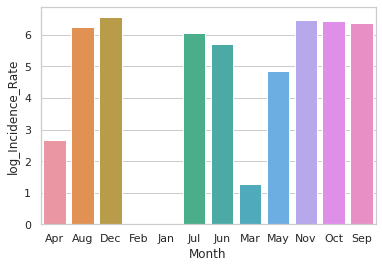

In [ ]:
ax = sns.barplot(x="Month", y="log_Incidence_Rate", data=Brazil_df)

Notice that the order of the months on the x-axis is strange. To correctly order them, one way is to create a list with the correct order and specify it as an argument to the barplot method. For example:

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

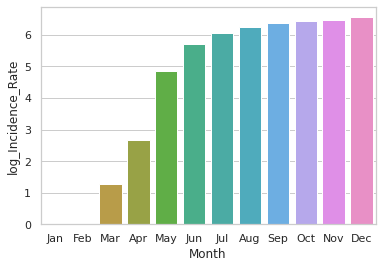

In [ ]:
ax = sns.barplot(x="Month", y="log_Incidence_Rate", data=Brazil_df, order=months)

Let's save the chart

In [ ]:
fig = ax.get_figure()

In [ ]:
fig.savefig('plot_2_bar.png', dpi=300, bbox_inches="tight")

Now let's go back to the data with the three countries (Brazil, USA, and China).

In [ ]:
countries_interest_df

,index,Country_Region,Month,Incidence_Rate,log_Incidence_Rate
0,0,Brazil,Apr,4.522590e+02,2.656346
1,1,Brazil,Aug,1.841120e+06,6.265082
2,2,Brazil,Dec,3.639264e+06,6.561014
3,3,Brazil,Feb,5.175024e-03,0.002242
4,4,Brazil,Jan,0.000000e+00,0.000000
5,5,Brazil,Jul,1.152721e+06,6.061725
6,6,Brazil,Jun,4.982112e+05,5.697414
7,7,Brazil,Mar,1.746382e+01,1.266322
8,8,Brazil,May,7.289139e+04,4.862682
9,9,Brazil,Nov,3.015440e+06,6.479351


##### Pointplot

Scatter plots are useful for comparing different levels for the same categorical variable. For example, comparing the same months in different countries.

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

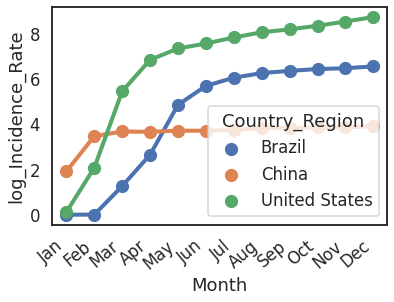

In [ ]:
ax = sns.pointplot(data=countries_interest_df, x="Month", y="log_Incidence_Rate", hue="Country_Region", order=months)

# Changing the angle at which the elements of the x-axis are displayed
ax.set_xticklabels(ax.get_xticklabels(),
                          rotation=40,
                          horizontalalignment='right')

In [ ]:
fig = ax.get_figure()

In [ ]:
fig.savefig('plot_3_bar.png', dpi=300, bbox_inches="tight")

##### FacetGrid


The FacetGrid class is useful when you want to analyze the distribution of a variable or multiple variables separately within subgroups in your data. You can find more information about it in the Seaborn documentation (https://seaborn.pydata.org/tutorial/axis_grids.html).

In [ ]:
sns.set_theme(style="white", context="talk", font_scale=1)

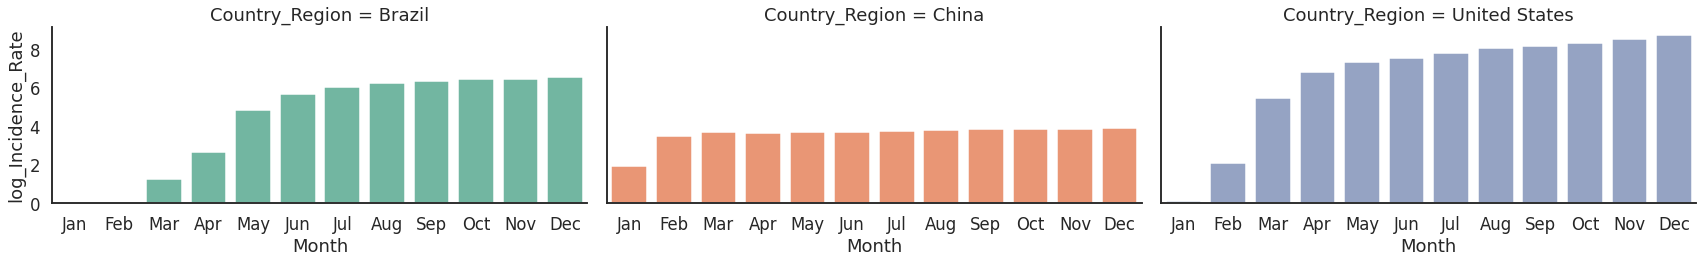

In [ ]:
g = sns.FacetGrid(
    countries_interest_df,
    col="Country_Region",  # or use row
    hue="Country_Region",
    palette="Set2",
    height=4,
    aspect=2)
g = g.map(sns.barplot, 'Month', 'log_Incidence_Rate', order=months)

Save the chart:

In [ ]:
g.savefig('plot_1_bar.png', dpi=300, bbox_inches="tight")

Note that your chart is saved in your Google Drive.